
# Logistic Regression Project - Solutions

this project contains a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [27]:
ad_data.columns # displays column names


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

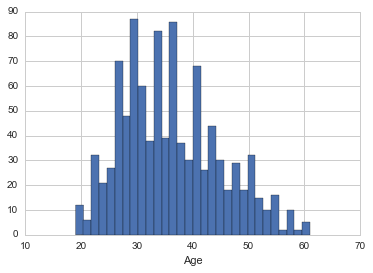

In [48]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

In [48]:
pd.crosstab(ad_data['Country'], ad_data['Clicked on Ad']).sort_values( 1,ascending = False).tail(10)


Clicked on Ad,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


In [296]:
ad_data[ad_data['Clicked on Ad']==1]['Country'].value_counts().head(10)

Ethiopia         7
Australia        7
Turkey           7
Liberia          6
Liechtenstein    6
South Africa     6
Senegal          5
Peru             5
Hungary          5
France           5
Name: Country, dtype: int64

In [52]:
ad_data['Country'].value_counts().head(10)

France            9
Czech Republic    9
Afghanistan       8
Turkey            8
South Africa      8
Micronesia        8
Cyprus            8
Senegal           8
Greece            8
Peru              8
Name: Country, dtype: int64

In [54]:
pd.crosstab(index=ad_data['Country'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


It seems that users are from all over the world with maximum from france and czech republic with a count of 9 each.



## Check for Missing Values

In [57]:
ad_data.isnull().sum()


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [59]:
type(ad_data['Timestamp'][1])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [63]:
# Extract datetime variables using timestamp column
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp']) 


In [64]:
# Converting timestamp column into datatime object in order to extract new features
ad_data['Month'] = ad_data['Timestamp'].dt.month 


In [65]:
# Creates a new column called Month
ad_data['Day'] = ad_data['Timestamp'].dt.day     


In [67]:
# Creates a new column called Day
ad_data['Hour'] = ad_data['Timestamp'].dt.hour   


In [69]:
# Creates a new column called Hour
ad_data["Weekday"] = ad_data['Timestamp'].dt.dayofweek 


In [70]:
# Dropping timestamp column to avoid redundancy
ad_data = ad_data.drop(['Timestamp'], axis=1) # deleting timestamp

we can also  use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column

In [72]:
# ad_data['Hour'] = ad_data['timeStamp'].apply(lambda time: time.hour)
# ad_data['Month'] = ad_data['timeStamp'].apply(lambda time: time.month)
# ad_data['Day of Week'] = ad_data['timeStamp'].apply(lambda time: time.dayofweek)

In [73]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


## Visualize Target Variable

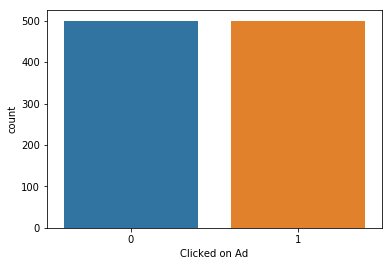

In [82]:
sns.countplot(x = 'Clicked on Ad', data = ad_data)

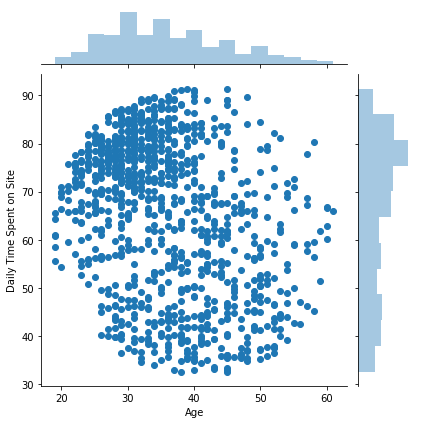

In [91]:
# Jointplot of daily time spent on site and age 
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = ad_data) 

We can see that more people aged between 30 to 40 are spending more time on site daily.

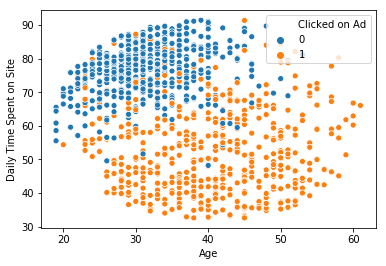

In [92]:
# scatterplot of daily time spent on site and age with clicking ads as hue
sns.scatterplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = ad_data) 

We can see that more people aged between 20 to 40 are spending more time on site daily but less chances of them to click on the ads.

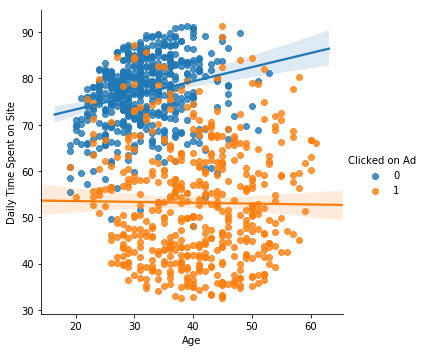

In [93]:
# Jointplot of daily time spent on site and age clicking ads as hue
sns.lmplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = ad_data) 

We can see that people that are younger and spends more time on site  click on the ads less and people who are in between 25-55 and spends less time click on the ads more.

## Distribution and Relationship Between Variables

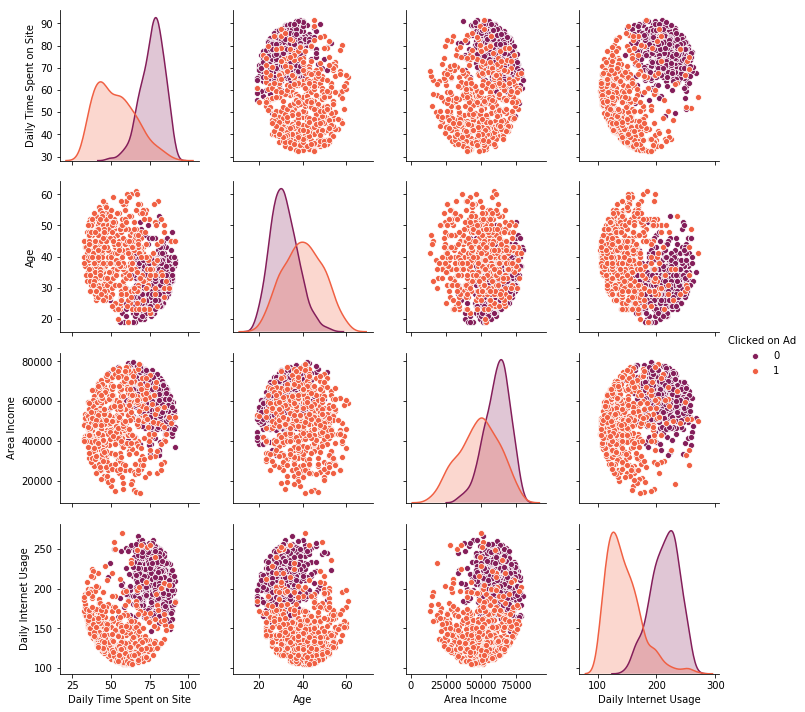

In [109]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(ad_data, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'rocket')

Pairplot represents the relationship between our target feature/variable and explanatory variables. It provides the possible direction of the relationship between the variables. We can see that people who spend less time on site and have less income and are aged more relatively are tend to click on ad.

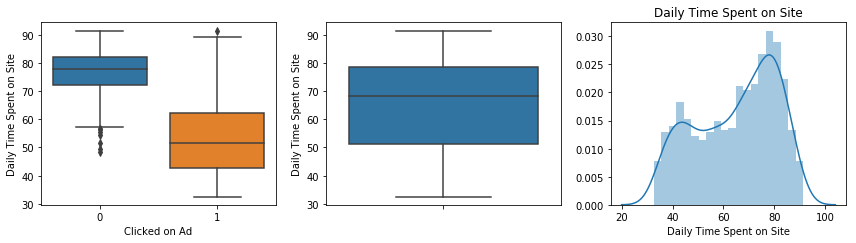

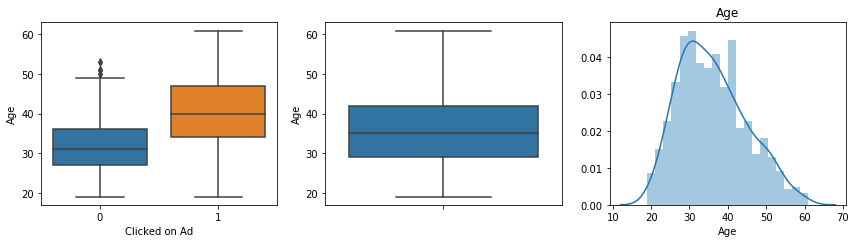

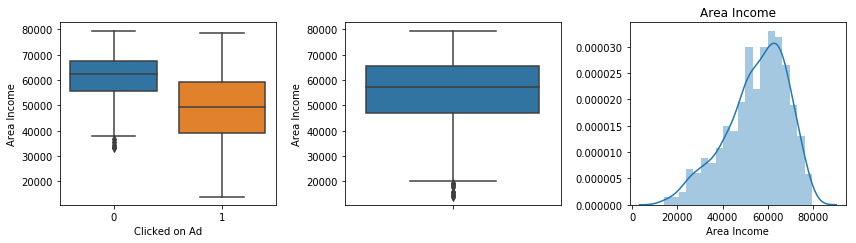

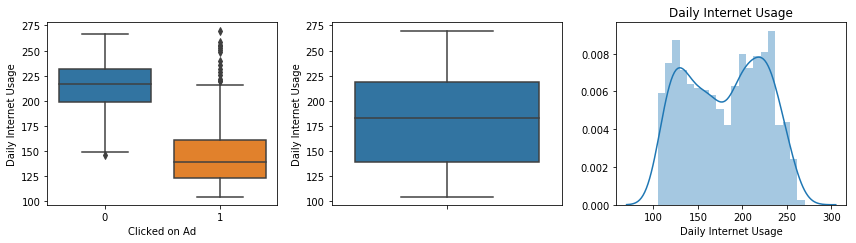

In [181]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (12, 6))
    
    plt.subplot(2,3,1)
    sns.boxplot(data= ad_data, y=ad_data[i],x='Clicked on Ad')
    plt.subplot(2,3,2)
    sns.boxplot(data= ad_data, y=ad_data[i])
    plt.subplot(2,3,3)
    sns.distplot(ad_data[i],bins= 20,)       
    plt.tight_layout()
    plt.title(i)    
    plt.show()
    

In [195]:
print('oldest person didn\'t clicked on the ad was of was of:', ad_data['Age'].max(), 'Years')
print('oldest person who clicked on the ad was of:', ad_data[ad_data['Clicked on Ad']==0]['Age'].max(), 'Years')

oldest person didn't clicked on the ad was of was of: 61 Years
oldest person who clicked on the ad was of: 53 Years


In [196]:
print('Youngest person was of:', ad_data['Age'].min(), 'Years')
print('Youngest person who clicked on the ad was of:', ad_data[ad_data['Clicked on Ad']==0]['Age'].min(), 'Years')


Youngest person was of: 19 Years
Youngest person who clicked on the ad was of: 19 Years


In [187]:
print('Average age was of:', ad_data['Age'].mean(), 'Years')

Average age was of: 36.009 Years


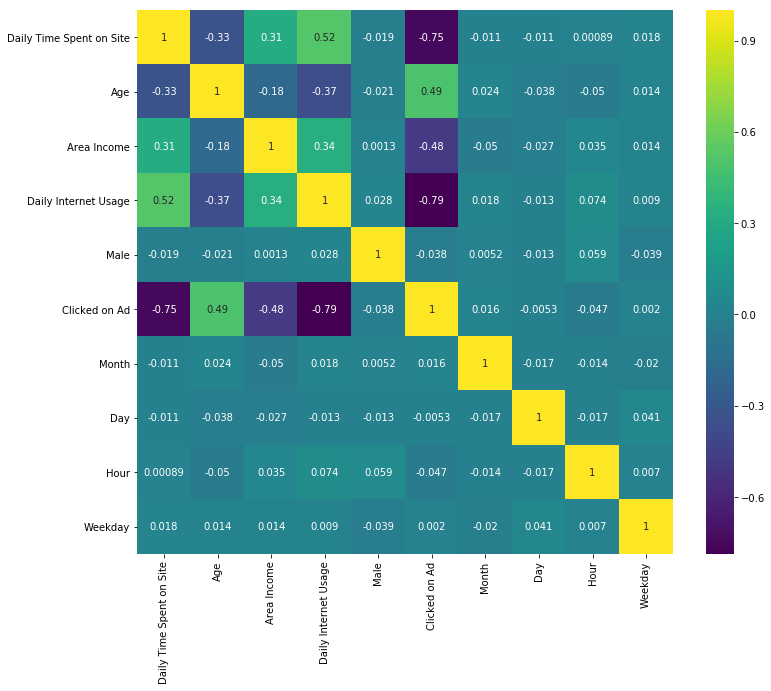

In [220]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(ad_data.corr(), cmap='viridis', annot = True) 
# Degree of relationship i.e correlation using heatmap

>Heatmap gives us better understanding of relationship between each feature. Correlation is measured between -1 and 1. Higher the absolute value, higher is the degree of correlation between the variables. We expect daily internet usage and daily time spent on site to be more correlated with our target variable. Also, none of our explantory variables seems to correlate with each other which indicates there is no collinearity in our data.

# Data visualization with Time, Days and Month

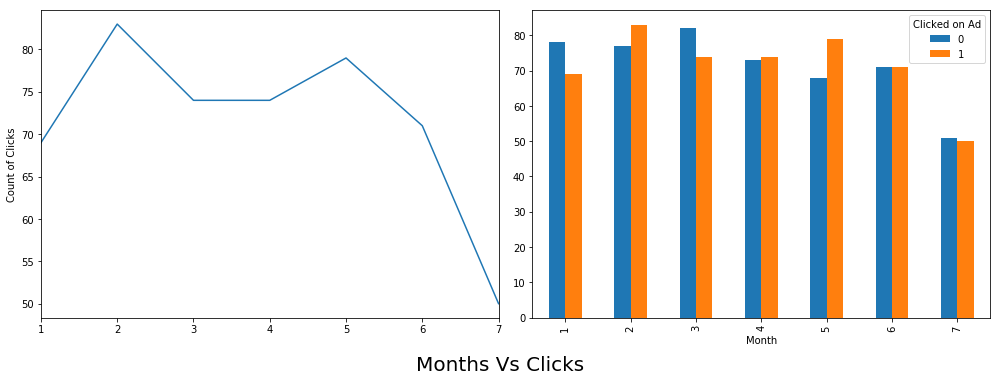

In [287]:
f,ax=plt.subplots(1,2,figsize=(14,5))
ad_data['Month'][ad_data['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(ad_data["Clicked on Ad"], ad_data["Month"]).T.plot(kind = 'Bar',ax=ax[1])
#ad_data.groupby(['Month'])['Clicked on Ad'].sum() 
plt.tight_layout()
plt.suptitle('Months Vs Clicks',y=0,size=20)
plt.show()

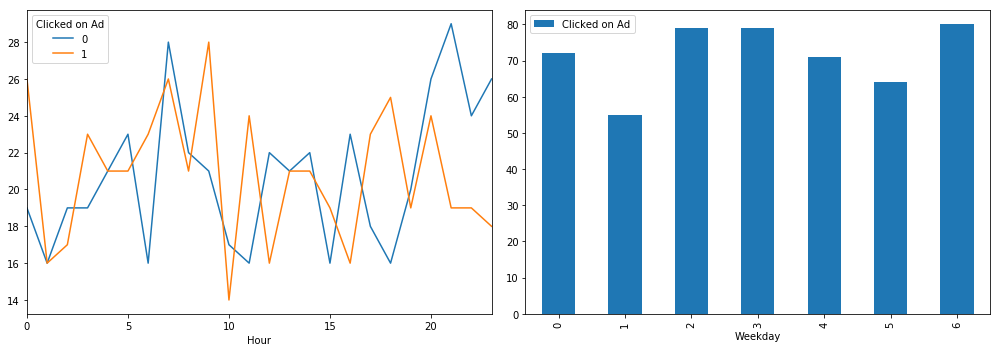

In [324]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(ad_data["Clicked on Ad"], ad_data["Hour"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(ad_data, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'Bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [325]:
from sklearn.model_selection import train_test_split

In [329]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [363]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670,)
(330, 5) (330,)


** Train and fit a logistic regression model on the training set.**

In [364]:
from sklearn.linear_model import LogisticRegression

In [365]:
logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [366]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [367]:
from sklearn.metrics import classification_report

In [368]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

   micro avg       0.98      0.98      0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



In [369]:
# Importing a pure confusion matrix from sklearn.metrics family
from sklearn.metrics import confusion_matrix

# Printing the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[170   1]
 [  5 154]]


The results from evaluation are as follows:

Confusion Matrix:

The users that are predicted to click on commercials and the actually clicked users were 154, the people who were predicted not to click on the commercials and actually did not click on them were 170.

The people who were predicted to click on commercial and actually did not click on them are 1, and the users who were not predicted to click on the commercials and actually clicked on them are 5.

We have only a few mislabelled points which is not bad from the given size of the dataset.

Classification Report:

From the report obtained, the precision & recall are 0.98 which depicts the predicted values are 98% accurate. Hence the probability that the user can click on the commercial is 0.98 which is a great precision value to get a good model.



In [370]:
logmodel.coef_

array([[-1.50398107e-01,  1.35053274e-01, -9.71534254e-05,
        -5.82231888e-02,  1.37799158e+00]])